## US Presidental Elections Analysis

As in the heat of the US election, I make this this project to crush data of the president elections in the US, to draw some insights of the US top politic over presidental elctions over the past 4 decades. 
By the end, i will also visualise the US economy data with politician background. 
The project will be focus in parts:
 - State-level popular vote trend over elections
 - Nation-lavel popular vs electrol college vote margins over elections 
 - Voter turn-out rate over time
 - The background of Polictic to the economy
 

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading datasets
#Election results at state-level 1976-2016 (Source:https://electionlab.mit.edu/data)
elections = pd.read_csv('/Users/huedinh/Desktop/Data projects/USA/1976-2016-president.csv')

#2020 Presidental election at county-level result-incomplted(Source: https://www.kaggle.com/unanimad/us-election-2020 Version 61st)
this_year_data = pd.read_csv('/Users/huedinh/Desktop/Data projects/USA/president_county_candidate.csv')

#Voter turnout-rate(Source - Wikipedia)
turnout = pd.read_csv('/Users/huedinh/Desktop/Data projects/USA/turnout_rate.csv')
#US domographic indexes (Source: WorldBank Data)
dmg = pd.read_csv('/Users/huedinh/Desktop/Data projects/USA/USA_demographic.csv')

# electoral college votes by states 
electrol = pd.read_csv('/Users/huedinh/Desktop/Data projects/USA/electoral_vote.csv')

### 1. Methodology

The presidential election in the US is popularly known about the competitive of 2 candidates. However, the fact is, there are more than 2 candidates in this final round. They come from smaller parties than the famous Republican and Democratic parties. 
To make the analysis more concentrate, I will only focus on these 2 parties which get the most support from American voters. Republic and Democrat. 
The race to the white house is not only about getting more public interest than the challenger but also reach the threshold of 270 Electrol college votes. Each state has a fixed number of college votes, and in all states but Maine and Nebraska, if a candidate wins popular, he gets all the electoral college. 
In this analysis, I will not dig into the details of election policies change over the years, but focus on popular votes and assume electoral votes by:

- Maine and Nebraska:  Candidates share the college votes by their popular vote rates, round the number to an integer. (In real life, using the 'congressional district method', these states allocate two electoral votes to the state popular vote winner, and then one electoral vote to the popular vote winner in each Congressional district (2 in Maine, 3 in Nebraska). Maine enacted this rule in advance of the 1972 presidential election, while Nebraska enacted it starting with the 1992 election.
- 'Winner takes it all' for all other states. 

The result of electoral college votes sightly differ from the official results. However, it does not change the outcome to make the elected-president. 

The data for the election this year is incompleted, some states are still carry on counting ballots, so this result is NOT the official outcome. (However, we have already known who won!)

### 2. Data Preparing 

In [3]:
#Dropping unnecessary variables in elections dataset
elections.drop(['state_fips','state_cen', 'office', 'writein','version','notes','state_ic'],axis = 'columns',inplace = True)
elections.head()

,year,state,state_po,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,AL,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,AL,"Ford, Gerald",republican,504070,1182850
2,1976,Alabama,AL,"Maddox, Lester",american independent party,9198,1182850
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",prohibition,6669,1182850
4,1976,Alabama,AL,"Hall, Gus",communist party use,1954,1182850


In [4]:
#Getting a dataframe which contains State and State_po
state_name = elections['state'].unique()
state_code = elections['state_po'].unique()
state_name = pd.DataFrame(state_name, columns=['state'])
state_code = pd.DataFrame(state_code, columns = ['state_po'])
state_namecode = pd.concat([state_name, state_code], axis = 1)

In [5]:
#This year election is in another dataset, get the total votes to state-level and add the 'Year' column
this_year = this_year_data.groupby(['state', 'candidate','party'])['votes'].sum()
this_year = this_year.to_frame()
this_year = this_year.reset_index()
this_year['year'] = 2020

In [6]:
#Add State_po to the dataframe of this year election
this_year_withcode = this_year.merge(state_namecode, on='state')
this_year_withcode.head()

,state,candidate,party,votes,year,state_po
0,Alabama,Write-ins,WRI,7274,2020,AL
1,Alabama,Donald Trump,REP,1434159,2020,AL
2,Alabama,Jo Jorgensen,LIB,24994,2020,AL
3,Alabama,Joe Biden,DEM,843473,2020,AL
4,Alaska,Brock Pierce,IND,297,2020,AK


In [7]:
#Calculate total votes for each candidate in each state
totalvotes_df = this_year.groupby('state')['votes'].sum()
totalvotes_df = totalvotes_df.reset_index()
totalvotes_df.rename(columns = {'votes':'totalvotes'},inplace = True)

#Add total state-level votes to this year dataframe
this_year_withcode = this_year_withcode.merge(totalvotes_df, on = 'state')
this_year_withcode.rename(columns = {'votes':'candidatevotes'}, inplace = True)

#Rename some other columns to be similar with elections dataset
this_year_withcode['party'].replace({'REP':'republican', 'DEM':'democrat'},inplace = True)
this_year_withcode.head()

,state,candidate,party,candidatevotes,year,state_po,totalvotes
0,Alabama,Write-ins,WRI,7274,2020,AL,2309900
1,Alabama,Donald Trump,republican,1434159,2020,AL,2309900
2,Alabama,Jo Jorgensen,LIB,24994,2020,AL,2309900
3,Alabama,Joe Biden,democrat,843473,2020,AL,2309900
4,Alaska,Brock Pierce,IND,297,2020,AK,131885


In [8]:
#Reorder the arrange of this year dataframe
this_year_withcode = this_year_withcode[['year','state', 'state_po', 'candidate','party', 'candidatevotes','totalvotes']]

#Merge the result of previous elections with the election this year
elections_full = pd.concat([elections,this_year_withcode])
elections_full = elections_full.reset_index()

elections_full.drop(['index'], axis =1, inplace = True)
elections_full.head()

,year,state,state_po,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,AL,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,AL,"Ford, Gerald",republican,504070,1182850
2,1976,Alabama,AL,"Maddox, Lester",american independent party,9198,1182850
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",prohibition,6669,1182850
4,1976,Alabama,AL,"Hall, Gus",communist party use,1954,1182850


In [9]:
#Generate a column with the unique code for state, each year, for later joining purpose
elections_full['for_join'] =elections_full['year'].astype(str) + elections_full['state_po']

#Get the results for Republican and Democrats separately, then later join them side by side
democrat = elections_full.query("party=='democrat'")
republican = elections_full.query("party=='republican'")
df = republican.merge(democrat, on = 'for_join')

df.head()

,year_x,state_x,state_po_x,candidate_x,party_x,candidatevotes_x,totalvotes_x,for_join,year_y,state_y,state_po_y,candidate_y,party_y,candidatevotes_y,totalvotes_y
0,1976,Alabama,AL,"Ford, Gerald",republican,504070,1182850,1976AL,1976,Alabama,AL,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alaska,AK,"Ford, Gerald",republican,71555,123574,1976AK,1976,Alaska,AK,"Carter, Jimmy",democrat,44058,123574
2,1976,Arizona,AZ,"Ford, Gerald",republican,418642,742719,1976AZ,1976,Arizona,AZ,"Carter, Jimmy",democrat,295602,742719
3,1976,Arkansas,AR,"Ford, Gerald",republican,267903,767535,1976AR,1976,Arkansas,AR,"Carter, Jimmy",democrat,498604,767535
4,1976,California,CA,"Ford, Gerald",republican,3882244,7803770,1976CA,1976,California,CA,"Carter, Jimmy",democrat,3742284,7803770


In [10]:
#Dropping duplicated columns and rename columns for using
df.drop(['year_y','state_y','state_po_y','party_x','party_y','totalvotes_x'], axis = 1, inplace = True)
df.rename(columns = {'year_x':'Year', 'state_x':'State','state_po_x':'state_po', 'candidate_x':'Rep_Candidate',
                    'candidatevotes_x':'Rep_votes','candidate_y':'Dem_Candidate', 'candidatevotes_y':"Dem_votes",
                     'totalvotes_y':'Total_votes'}, inplace = True)

In [11]:
df.head()

,Year,State,state_po,Rep_Candidate,Rep_votes,for_join,Dem_Candidate,Dem_votes,Total_votes
0,1976,Alabama,AL,"Ford, Gerald",504070,1976AL,"Carter, Jimmy",659170,1182850
1,1976,Alaska,AK,"Ford, Gerald",71555,1976AK,"Carter, Jimmy",44058,123574
2,1976,Arizona,AZ,"Ford, Gerald",418642,1976AZ,"Carter, Jimmy",295602,742719
3,1976,Arkansas,AR,"Ford, Gerald",267903,1976AR,"Carter, Jimmy",498604,767535
4,1976,California,CA,"Ford, Gerald",3882244,1976CA,"Carter, Jimmy",3742284,7803770


In [12]:
#Adding electrol college votes to each states

electrol.rename(columns={'STATE':'state_po'}, inplace = True)
df = df.merge(electrol, on = 'state_po')
df.head()

,Year,State,state_po,Rep_Candidate,Rep_votes,for_join,Dem_Candidate,Dem_votes,Total_votes,ELECTORAL VOTE
0,1976,Alabama,AL,"Ford, Gerald",504070,1976AL,"Carter, Jimmy",659170,1182850,9
1,1980,Alabama,AL,"Reagan, Ronald",654192,1980AL,"Carter, Jimmy",636730,1341929,9
2,1984,Alabama,AL,"Reagan, Ronald",872849,1984AL,"Mondale, Walter",551899,1441713,9
3,1988,Alabama,AL,"Bush, George H.W.",815576,1988AL,"Dukakis, Michael",549506,1378476,9
4,1992,Alabama,AL,"Bush, George H.W.",804283,1992AL,"Clinton, Bill",690080,1688060,9


In [13]:
#Checking if all candidate names are inified and no duplicated rows

print(df.groupby('Rep_Candidate')['Rep_Candidate'].count())
print(df.groupby('Dem_Candidate')['Dem_Candidate'].count())

Rep_Candidate
Bush, George H.W.    102
Bush, George W.      101
Dole, Robert          51
Donald Trump          51
Ford, Gerald          51
McCain, John          51
Mitt, Romney           1
Reagan, Ronald       102
Romney, Mitt          49
Trump, Donald J.      55
Name: Rep_Candidate, dtype: int64
Dem_Candidate
Carter, Jimmy       102
Clinton, Bill       102
Clinton, Hillary     54
Dukakis, Michael     51
Gore, Al             50
Joe Biden            51
Kerry, John          50
Mondale, Walter      51
Obama, Barack H.    101
Other                 1
Name: Dem_Candidate, dtype: int64


In [14]:
#Now,in df, there is only one row represent for one election in one state, 
# so the 'fo_join' value should be unique in order to ensure there are more than 1 row of result for an election in a state
#Filter for duplicated values 
for_filter = df.groupby('for_join')['for_join'].count() !=1
for_filter = for_filter.to_frame()
for_filter[for_filter['for_join']==True]

,for_join
for_join,
2004MD,True
2016AZ,True
2016MD,True


In [15]:
#Check the information of dupilcated values 
print(df[df['for_join']=='2004MD'])
print(df[df['for_join']=='2016AZ'])
print(df[df['for_join']=='2016MD'])

     Year     State state_po    Rep_Candidate  Rep_votes for_join  \
248  2004  Maryland       MD  Bush, George W.    1024703   2004MD   
249  2004  Maryland       MD  Bush, George W.    1024703   2004MD   

    Dem_Candidate  Dem_votes  Total_votes  ELECTORAL VOTE  
248   Kerry, John    1334493      2384238              10  
249         Other          7      2384238              10  
    Year    State state_po     Rep_Candidate  Rep_votes for_join  \
34  2016  Arizona       AZ  Trump, Donald J.    1252401   2016AZ   
35  2016  Arizona       AZ  Trump, Donald J.    1252401   2016AZ   

       Dem_Candidate  Dem_votes  Total_votes  ELECTORAL VOTE  
34  Clinton, Hillary    1161167      2573165              11  
35               NaN         42      2573165              11  
     Year     State state_po     Rep_Candidate  Rep_votes for_join  \
252  2016  Maryland       MD  Trump, Donald J.     943169   2016MD   
253  2016  Maryland       MD  Trump, Donald J.     943169   2016MD   
254  201

In [16]:
#Unify name for Mitt Romney, John Kerry and drop duplicated values 

df['Rep_Candidate'].replace({'Mitt, Romney':'Romney, Mitt'},inplace = True)
df['Dem_Candidate'].replace({'Other':'Kerry, John'},inplace = True)
df.drop([35,249, 253, 254,255],inplace = True)

In [17]:
#Creating new ratio columns for competing votes for each party

df['Rep_rate']=df['Rep_votes']/df['Total_votes']
df['Dem_rate']= df['Dem_votes']/df['Total_votes']
df['Rep_Win?']= df['Rep_rate'] - df['Dem_rate']


In [18]:
#Separate the data to 2 parts due to the difference in electoral college votes policies

partial = pd.concat([df[df['state_po']=='ME'], df[df['state_po']=='NE']])
whole = df[df['state_po']!='ME']
whole = whole[whole['state_po']!='NE']

In [19]:
#Calculate electrol college votes for candidates in ME AND NE
partial['Dem_electrolvote'] = round(df['Dem_rate']*df['ELECTORAL VOTE'],0)
partial['Rep_electrolvote'] = round(df['Rep_rate']*df['ELECTORAL VOTE'],0)

In [20]:
#Calculate electrol college votes for candidates in "Winner takes it all" - states
whole['Dem_electrolvote'] = np.where(whole['Rep_Win?']>0, 0, whole['ELECTORAL VOTE'])
whole['Rep_electrolvote'] = np.where(whole['Rep_Win?']<0, 0, whole['ELECTORAL VOTE'])
 

### 3. Data Visualisation 

In [22]:
#Join the two type of electrol votes policy states
full_result = pd.concat([partial, whole])

#Get the table to make the heat map
wise_party = full_result[['Year', 'State', 'Rep_Win?']]

#Convert to pivot table
wise_party = wise_party.pivot(index = 'State', columns = 'Year', values = 'Rep_Win?')

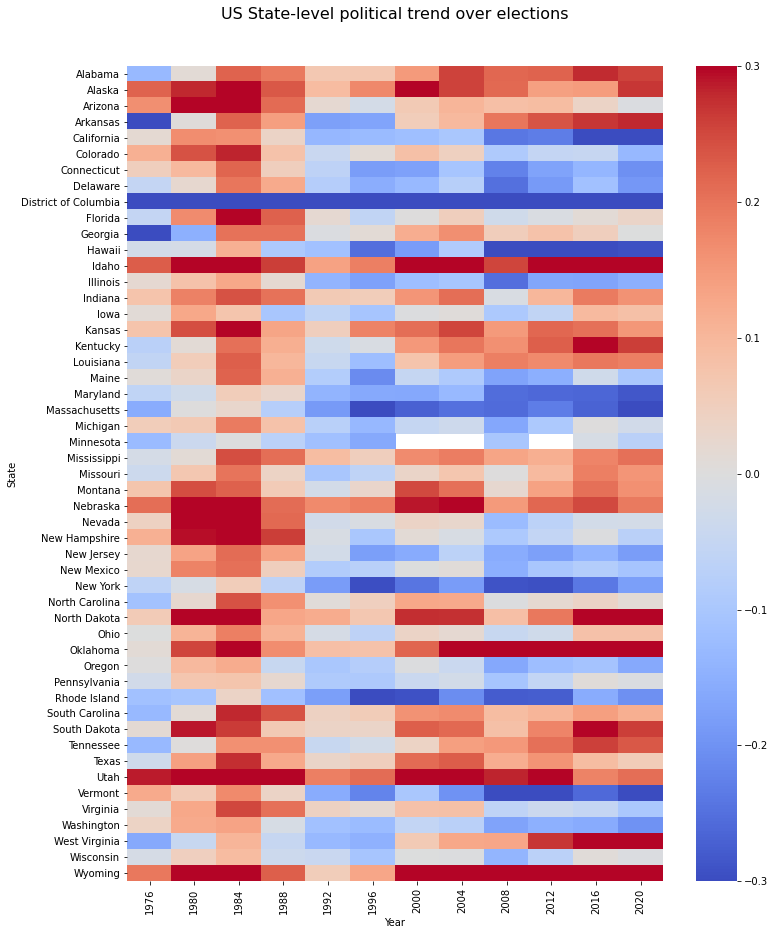

In [25]:
#Plotting the political trend in states 
g = sns.heatmap(wise_party, vmax = 0.3, vmin = -0.3, cmap = 'coolwarm', center = 0, yticklabels = True)
g.set_title('US State-level political trend over elections', size = 16, y = 1.05)
g.figure.set_size_inches(12, 15)
fig = g.get_figure()
fig.savefig('State-levelheatmap.jpg')

From here, we can see why they call 'Republican states' and 'Democrat states'. There are states always red or always blue since the 1976 election. However, the period of 1980 to 1992, we can see most states in America turned to the warm-tone. It was the recognition of the Republican credentials, under the leading of Ronal Reagan and Reagan Revolution.

The next 2 elections which brought the presidency to Bill Clinton, the popularity between 2 parties were quite competitive, which represents by the neutral colour tones. 

Getting closer to the present, American politic opinions getting more divided. Many states get heavy red, many others get heavy blue, while some stay "swing", which are: Virginia, North Carolina, Pennsylvania, Ohio, Iowa, Georgia, Florida and Arizona. That's why they call these are 'battleground' for presidential campaigns because, with only one more popular votes, a candidate can get all college votes. 

In [26]:
#Calculate for the president-elected 
national_level = full_result.groupby(['Year','Rep_Candidate','Dem_Candidate'])['Rep_votes',
                                                                                    'Dem_votes','Dem_electrolvote',
                                                                                    'Rep_electrolvote','Total_votes'].sum()
national_level=national_level.reset_index()

#Creating new columns for comparing ratios

national_level['Rep_rate']=national_level['Rep_votes']/national_level['Total_votes']
national_level['Dem_rate']= national_level['Dem_votes']/national_level['Total_votes']
national_level['Rep_Win?']= (national_level['Rep_rate'] - national_level['Dem_rate'])*1000


/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [46]:
national_level['Rep_Win?votecount'] = national_level['Rep_votes'] - national_level['Dem_votes']

In [27]:
#President-elected is the one who gets over the threshold 270 electrol college votes

national_level['President-Elected']=np.where(national_level['Rep_electrolvote']>270, 
                                                  national_level['Rep_Candidate'], national_level['Dem_Candidate'])

In [29]:
#The result may have minor vary from the official result due to the authenticity of the data and the policy changing at
#certain states/counties 
national_level['Presidentforshort'] = ['Carter', 'Reagan', 'Reagan ', 'Bush.', 'Clinton', 
                                            'Clinton ', 'Bush', 'Bush ', 'Obama', 'Obama ', 'Trump', 'Biden']
national_level.to_csv('National_level_president_election.csv')

In [47]:
national_level

,Year,Rep_Candidate,Dem_Candidate,Rep_votes,Dem_votes,Dem_electrolvote,Rep_electrolvote,Total_votes,Rep_rate,Dem_rate,Rep_Win?,President-Elected,Presidentforshort,Rep_Win?votecount
0,1976,"Ford, Gerald","Carter, Jimmy",38870893,40680446,293.0,238.0,81601344,0.476351,0.498527,-22.175529,"Carter, Jimmy",Carter,-1809553
1,1980,"Reagan, Ronald","Carter, Jimmy",43642639,35480948,83.0,447.0,86496851,0.504558,0.410199,94.358244,"Reagan, Ronald",Reagan,8161691
2,1984,"Reagan, Ronald","Mondale, Walter",54166829,37449813,16.0,515.0,92654861,0.584609,0.404186,180.422439,"Reagan, Ronald",Reagan,16717016
3,1988,"Bush, George H.W.","Dukakis, Michael",48642640,41716679,100.0,431.0,91586825,0.531110,0.455488,75.621805,"Bush, George H.W.",Bush.,6925961
4,1992,"Bush, George H.W.","Clinton, Bill",38798913,44856747,351.0,177.0,104599780,0.370927,0.428842,-57.914405,"Clinton, Bill",Clinton,-6057834
5,1996,"Dole, Robert","Clinton, Bill",39003697,47295351,364.0,166.0,96389818,0.404645,0.490667,-86.022094,"Clinton, Bill",Clinton,-8291654
6,2000,"Bush, George W.","Gore, Al",49201713,49662314,238.0,283.0,103155297,0.476967,0.481433,-4.465122,"Bush, George W.",Bush,-460601
7,2004,"Bush, George W.","Kerry, John",60526016,57449540,231.0,290.0,119521063,0.506405,0.480665,25.740032,"Bush, George W.",Bush,3076476
8,2008,"McCain, John","Obama, Barack H.",59613835,69338846,353.0,178.0,131419253,0.453616,0.527616,-73.999896,"Obama, Barack H.",Obama,-9725011
9,2012,"Romney, Mitt","Obama, Barack H.",59349892,64205850,317.0,204.0,126203436,0.470272,0.508749,-38.477225,"Obama, Barack H.",Obama,-4855958


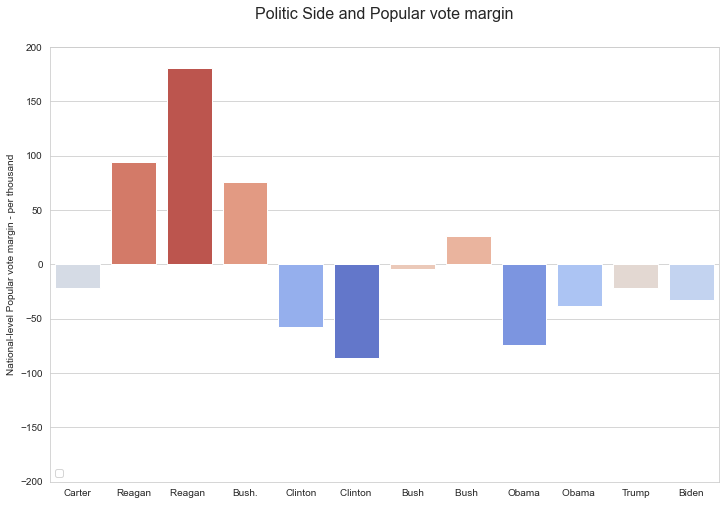

In [36]:
sns.set_style('whitegrid')
g = sns.barplot(x = 'Presidentforshort', y = 'Rep_Win?', data = national_level, hue = 'Rep_Win?', palette='coolwarm', dodge = False)
g.legend([])
g.figure.set_size_inches(12, 8)
g.set_title('Politic Side and Popular vote margin', size = 16, y = 1.05)
g.set(ylabel = 'National-level Popular vote margin - per thousand', 
     ylim=(-200, 200))
g.set_xlabel('')
fig = g.get_figure()
fig.savefig('Politicside.jpg')

To the national-scale, after the presidency of (father) Bush, it seems to be more challenging for any Republican candidate to get more popular votes. Significantly, in 2000, Bush (son) won the White House without winning the public. He was behind Gore Al ONLY 46 thousands votes. History repeated in the 2016 election with 8 times larger margin, Trump won the presidency with almost 3 million votes behind Clinton. 

Clearly, getting more public votes is not the key to the White House. 

In [38]:
#Plotting the differences 
my_range=range(1,len(national_level.index)+1)

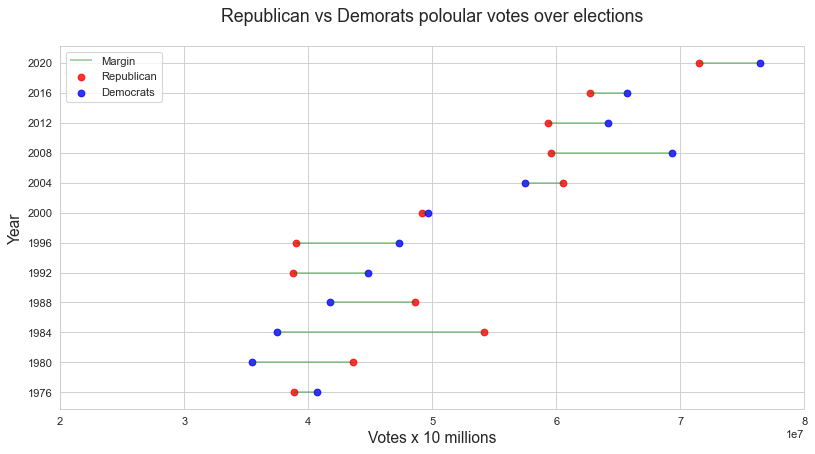

In [40]:
#Plotting the margin of popular votes
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set_style('whitegrid')

plt.hlines(y = my_range, xmin = national_level['Rep_votes'], 
           xmax =national_level['Dem_votes'], color = 'green', alpha = 0.4)
plt.scatter(national_level['Rep_votes'], my_range, color = 'red', alpha = 0.8)
plt.scatter(national_level['Dem_votes'], my_range, color = 'blue', alpha = 0.8)
plt.legend(['Margin','Republican','Democrats'])
plt.yticks(np.arange(1, 13, step=1), 
           labels = (national_level['Year']))
plt.ylabel('Year', size = 14)
plt.xlim(20000000,80000000)
plt.xlabel('Votes x 10 millions', size = 14)
plt.title('Republican vs Demorats poloular votes over elections', size = 16, y = 1.05)
plt.savefig('Popularvote_margin.jpg')

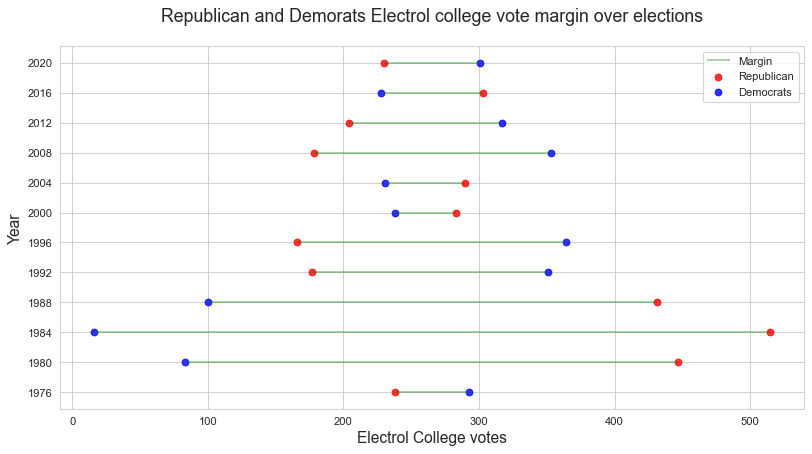

In [41]:
#Plotting the margins of electrol college votes
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hlines(y = my_range, xmin = national_level['Rep_electrolvote'], 
           xmax =national_level['Dem_electrolvote'], color = 'green', alpha = 0.4)
plt.scatter(national_level['Rep_electrolvote'], my_range, color = 'red', alpha = 0.8)
plt.scatter(national_level['Dem_electrolvote'], my_range, color = 'blue', alpha = 0.8)
plt.legend(['Margin','Republican','Democrats'])
plt.yticks(np.arange(1, 13, step=1), 
           labels = (national_level['Year']))
plt.ylabel('Year', size = 14)
plt.xlabel('Electrol College votes', size = 14)
plt.title('Republican and Demorats Electrol college vote margin over elections', size = 16, y = 1.05)
plt.savefig('Electrol-collegevote-margin.jpg')

In [107]:
turnout.head()

,Year,VEP,Turnout,Population
0,1932,75768000,39817000,123100000
1,1936,80174000,45647000,128100000
2,1940,84728000,49815000,132100000
3,1944,85654000,48026000,138400000
4,1948,95573000,48834000,146600000


In [42]:
#Get the turn-out ratios
turnout['VEP/Pop_rate'] = turnout['VEP']/turnout['Population']
turnout['Turnout/Pop_rate'] = turnout['Turnout']/turnout['Population']
turnout['Turnout/VEP_rate'] = turnout['Turnout']/turnout['VEP']

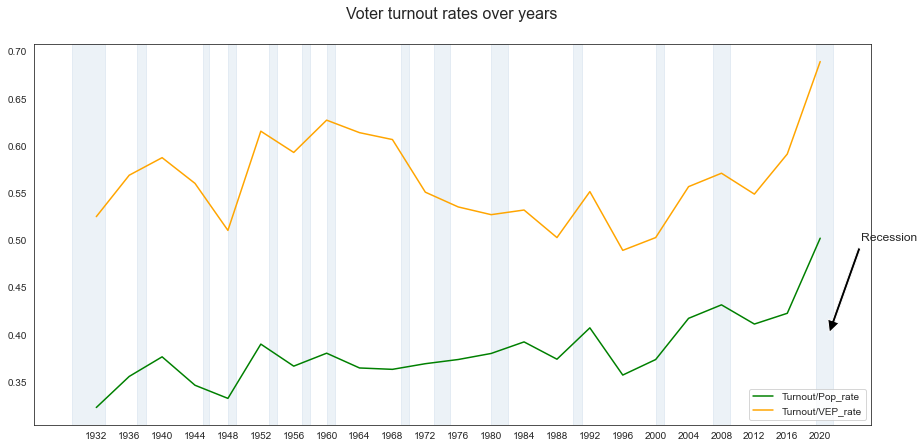

In [43]:
#Plotting Voter turnout overtime
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15, 7))
ax.axvspan(1929,1933,color='steelblue',alpha=0.1)
ax.axvspan(1937,1938,color='steelblue',alpha=0.1)
ax.axvspan(1945,1945.7,color='steelblue',alpha=0.1)
ax.axvspan(1948,1949,color='steelblue',alpha=0.1)
ax.axvspan(1953,1954,color='steelblue',alpha=0.1)
ax.axvspan(1957,1958,color='steelblue',alpha=0.1)
ax.axvspan(1960,1961,color='steelblue',alpha=0.1)
ax.axvspan(1969,1970,color='steelblue',alpha=0.1)
ax.axvspan(1973,1975,color='steelblue',alpha=0.1)
ax.axvspan(1980,1982,color='steelblue',alpha=0.1)
ax.axvspan(1990,1991,color='steelblue',alpha=0.1)
ax.axvspan(2000,2001,color='steelblue',alpha=0.1)
ax.axvspan(2007,2009,color='steelblue',alpha=0.1)
ax.axvspan(2019.5,2021.5,color='steelblue',alpha=0.1)
ax.plot(turnout['Year'], turnout['Turnout/Pop_rate'], color = 'green')
ax.plot(turnout['Year'], turnout['Turnout/VEP_rate'], color = 'orange')
ax.legend(['Turnout/Pop_rate','Turnout/VEP_rate'])
ax.set_title('Voter turnout rates over years', size = 16, y = 1.05)
ax.set_xticks(turnout['Year'])
plt.annotate('Recession', xy = (2021, 0.4), xytext =(2025, 0.5),
            arrowprops = {'facecolor':'black', 'width':3, 'shrink':0.03}, size = 12)
plt.savefig('Turnout-rate&Recession.jpg')

The voter turnout rate in America has fluctuated over time but in general, it has been increasing. It's heavily relied on the voting policies change in America.  The fact is, the voting right has reached closer to each of every group of society. 

Does the voter turn-out rate have a strong correlation to economy recession? This question perhaps needs a much deeper analysis to answer. Nonetheless, this chart does show some relation between the increasing number of people who vote and the economic situation, especially from 1990. 

In [44]:
dmg=dmg[dmg['Year']>1970]

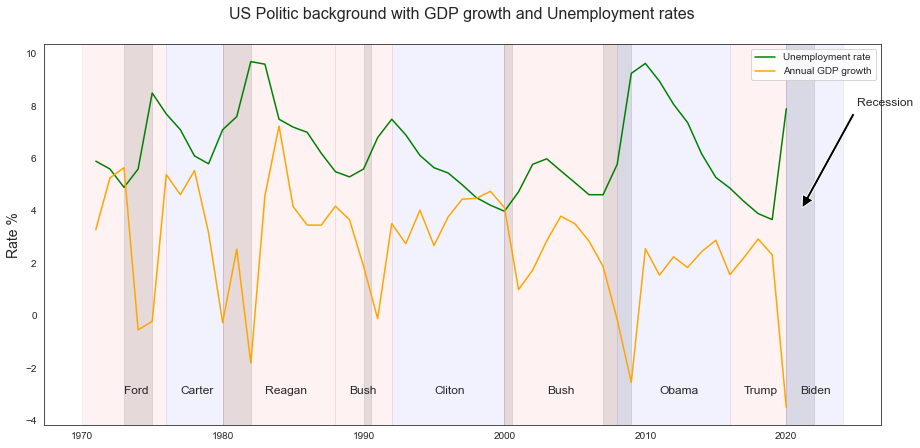

In [45]:
#Plotting USA economy and society over times
fig, bx = plt.subplots(figsize=(15, 7))
bx.axvspan(1973,1975,color='grey',alpha=0.2)
bx.axvspan(1980,1982,color='grey',alpha=0.2)
bx.axvspan(1990,1990.5,color='grey',alpha=0.2)
bx.axvspan(2000,2000.5,color='grey',alpha=0.2)
bx.axvspan(2007,2009,color='grey',alpha=0.2)
bx.axvspan(2020,2022,color='grey',alpha=0.2)
bx.axvspan(1970,1976,color='red',alpha=0.05)
bx.axvspan(1976,1980,color='blue',alpha=0.05)
bx.axvspan(1980,1988,color='red',alpha=0.05)
bx.axvspan(1988,1992,color='red',alpha=0.05)
bx.axvspan(1992,2000,color='blue',alpha=0.05)
bx.axvspan(2000,2008,color='red',alpha=0.05)
bx.axvspan(2008,2016,color='blue',alpha=0.05)
bx.axvspan(2016,2020,color='red',alpha=0.05)
bx.axvspan(2020,2024,color='blue',alpha=0.05)
bx.plot(dmg['Year'], dmg['Unemployment_rate'], color = 'green')
bx.plot(dmg['Year'], dmg['Annual_GDP_growth'], color = 'orange')
bx.legend(['Unemployment rate', 'Annual GDP growth'])
bx.set_title('US Politic background with GDP growth and Unemployment rates', size = 16, y = 1.05)
bx.set_ylabel('Rate %', size = 14)
plt.text(1973, -3, 'Ford', size = 12)
plt.text(1977, -3, 'Carter', size = 12)
plt.text(1983, -3, 'Reagan', size = 12)
plt.text(1989, -3, 'Bush', size = 12)
plt.text(1995, -3, 'Cliton', size = 12)
plt.text(2003, -3, 'Bush', size = 12)
plt.text(2011, -3, 'Obama', size = 12)
plt.text(2017, -3, 'Trump', size = 12)
plt.text(2021, -3, 'Biden', size = 12)
plt.annotate('Recession', xy = (2021, 4), xytext =(2025, 8),
            arrowprops = {'facecolor':'black', 'width':3, 'shrink':0.03}, size = 12)
plt.savefig('Politic_and_economy.jpg')                    

Recessions may not fully urge people to go voting, but it has been the game-changer in deciding if the ruling party will continue to stay in power. 

Republican Reagan replaced Democrat Carter in the Whitehouse after the beginning of the big dip since 1980. 
Democrat Clinton replaced Republican Bush after the 1990 recession. 
The initial issue Obama had to face is the economic recovery from the great recession since 2007, in the late period of Bush. 
And this year, Democrat got back the White House from Trump during the century global health pandemic with the deepest deep of the GDP growth. 

In conclusion, because there are only two big parties which can able to govern the country, American has not always voted to choose the president but the party. And more importantly, they vote to decide whether to continue the direction of the current ruling party or to change. 
